In [1]:
import numpy as np
from szegedy import SzegedyRandomWalk
import matplotlib.pyplot as plt

In [2]:
def probability_graph(N, resetting_rate, t=100, starting_vec=None):
    # crete the matrix
    matrix = np.zeros((N, N), dtype=np.float128)
    # add loop for starting point
    matrix[0][0] = 1
    
    # add resetting edges and loops
    for j in range(1, N):
        matrix[j][0] = resetting_rate
        matrix[j][j] = 1 - matrix[j][0]
        
    szegedy = SzegedyRandomWalk(matrix)
    
    # starting position
    if starting_vec is None:
        initial_state = np.ones(N, dtype=np.float128) / np.sqrt(N - 1, dtype=np.float128)
        initial_state[0] = 0
        initial_state_H = np.kron(initial_state, initial_state) 
    else:
        initial_state_H = starting_vec

    # perform walk
    probabilities = []
    state = initial_state_H
    for i in range(t):
        state = szegedy.operator @ state
        probabilities.append(np.power(state, 2).reshape((N, N)).sum(axis=1)[0])
        
    return probabilities

## Finding period of sample walk

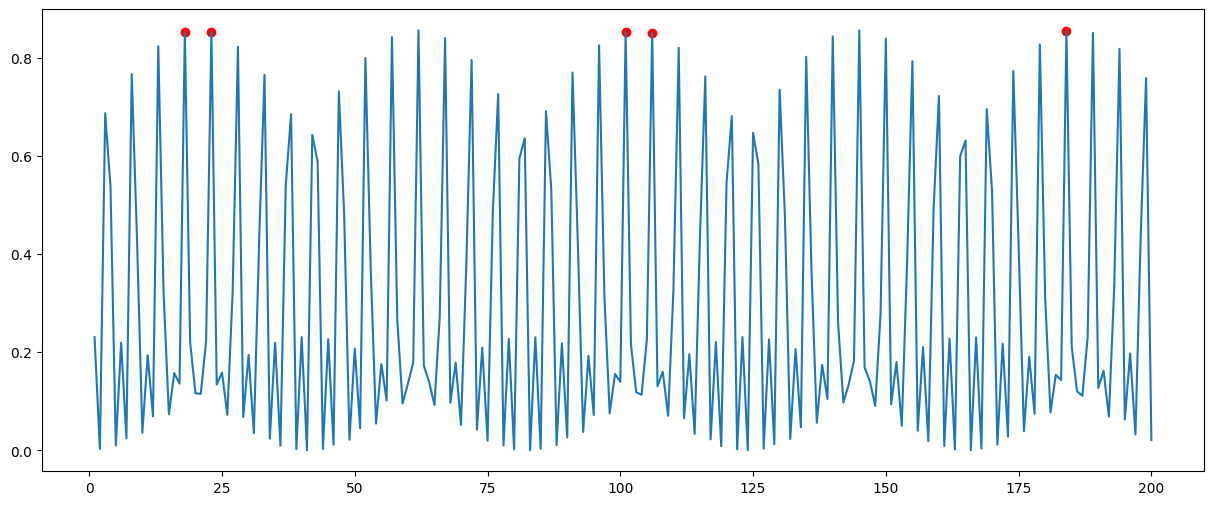

In [14]:
plt.show()
plt.figure(figsize=(15, 6))
prob = probability_graph(2, 0.2, 200)
plt.plot([i for i in range(1, 201)], prob)
plt.scatter([18, 18 + 5, 101, 18 + 5 + 83, 184], [prob[17], prob[18 + 5 - 1], prob[100], prob[18 + 5 + 83 - 1], prob[183]], color='red')
plt.show()

## Plotting only every 83th point

In [7]:
prob = probability_graph(2, 0.2, 20_000)

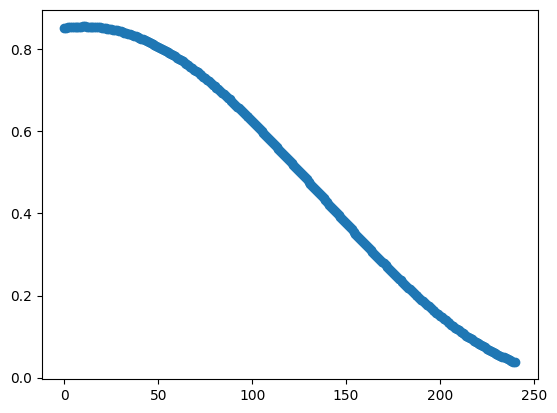

In [10]:
selected = prob[17:][0::83]
plt.scatter(list(range(len(selected))), selected)
plt.show()

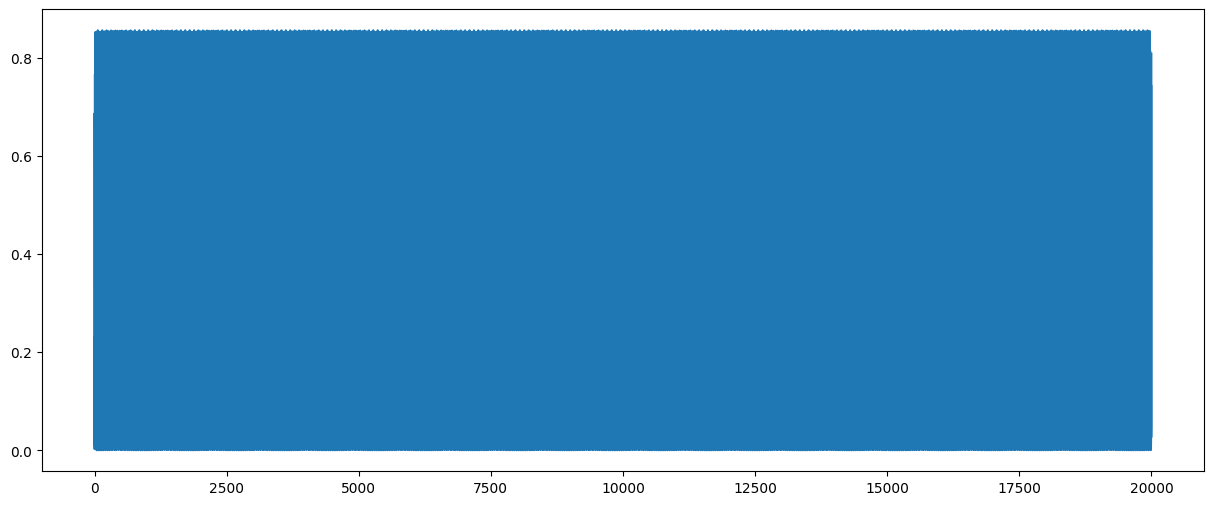

In [12]:
plt.show()
plt.figure(figsize=(15, 6))
plt.plot([i for i in range(1, 20_001)], probability_graph(2, 0.2, 20_000))
plt.show()